**Evaluate**

Logan Wongbangchuad

Seth Boggess

and Johnny Woehrle

Data Science: CS-4330

GitHub Link: https://github.com/LoganWongbangchuad/DataScience

In [177]:
#importing everything needed in this file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import log_loss, accuracy_score

In [178]:
#This grabs the three data sets from our gethub for use to use in this file

#The main database
url = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/NCHS_-_Leading_Causes_of_Death__United_States.csv"
OriginalDf = pd.read_csv(url)

#Database that has the Population of everystate from 1950 to 2019
url2 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/historical_state_population_by_year.csv"
PopulationDf = pd.read_csv(url2)

#Database that has the percentage of obisity of each state in the year 2013
url3 = "https://raw.githubusercontent.com/LoganWongbangchuad/DataScience/main/dataset/LakeCounty_Health_2397514566901885190.csv"
ObesityDf = pd.read_csv(url3)

#Merges the OriginalDf and ObesityDf into one database
df = pd.merge(OriginalDf, PopulationDf, on=['State', 'Year'], how='inner')
df.drop('113 Cause Name', axis=1, inplace=True)

In [179]:
#Code that cleans the df taking out columns not needed.
#This also makes two dataframes. df_allCauses is only where Cause type is All Causes and df_cleaned is the rest of the Cause names

# Deleting rows where state is 'District of Columbia'
df_cleaned = df[df['State'] != 'District of Columbia']
df_cleaned = df_cleaned[df_cleaned['State'] != 'United States']
# Deleting rows where 'cause_name' is 'all causes'
df_cleaned = df_cleaned[df_cleaned['Cause Name'] != 'All causes']

df_allCauses = df[df['State'] != 'District of Columbia']
df_allCauses = df_allCauses[df_allCauses['State'] != 'United States']
# Deleting rows where 'cause_name' is not 'all causes'
df_allCauses = df_allCauses[df_allCauses['Cause Name'] == 'All causes']
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Cause Name' column
df_cleaned['Cause Name Encoded'] = label_encoder.fit_transform(df_cleaned['Cause Name'])

df_cleaned.describe()


,Year,Deaths,Age-adjusted Death Rate,Population,Cause Name Encoded
count,9500.000000,9500.000000,9500.000000,9.500000e+03,9500.000000
mean,2008.000000,3811.662842,60.430547,6.044665e+06,4.500000
std,5.477514,7224.888572,66.966073,6.676465e+06,2.872433
min,1999.000000,21.000000,2.600000,4.796020e+05,0.000000
25%,2003.000000,568.000000,18.300000,1.783440e+06,2.000000
50%,2008.000000,1449.000000,31.600000,4.309870e+06,4.500000
75%,2013.000000,3326.000000,55.200000,6.829676e+06,7.000000
max,2017.000000,71930.000000,347.400000,3.935850e+07,9.000000


**df_cleaned:**

Columns:



*   Year
*   Cause Name
*   State
*   Deaths
*   Age-adjusted Death Rate
*   Population
*   Cause Name Encoded

**Numerical Features:**

Year: 1999-2017

Deaths: 21-2813503

Age-adjusted Death Rate: 2.6-1087.3

Cause Name Encoded Numerically: 0-9

Population: 43000 - 39512223

**Categorical Features:**
Cause Name: Unintentional Injuries, all causes, Alzheimer's disease, stroke, CLRD, Diabetes, Heart Disease, Influenza and pneumonia, Suicide, Cancer, Kidney disease.

State: Unites States, (All 50 states)s



In [180]:
#This makes a dataset that averages the Death, population and Age-adjusted Death Rate for each state and cause name
df_condensed = df_cleaned.groupby(['State', 'Cause Name']).agg({
    'Age-adjusted Death Rate': 'mean',
    'Deaths': 'mean',
    'Population' : 'mean'
}).reset_index()

print(df_condensed)

       State               Cause Name  Age-adjusted Death Rate        Deaths  \
0    Alabama      Alzheimer's disease                31.315789   1536.842105   
1    Alabama                     CLRD                52.510526   2698.000000   
2    Alabama                   Cancer               194.773684  10062.631579   
3    Alabama                 Diabetes                26.400000   1332.421053   
4    Alabama            Heart disease               254.447368  12660.157895   
..       ...                      ...                      ...           ...   
495  Wyoming  Influenza and pneumonia                22.431579    117.105263   
496  Wyoming           Kidney disease                11.384211     61.736842   
497  Wyoming                   Stroke                42.726316    223.631579   
498  Wyoming                  Suicide                21.700000    118.368421   
499  Wyoming   Unintentional injuries                56.905263    311.210526   

       Population  
0    4.674425e+06  

**Df Condensed:**

Df Condensed is the same is df_cleaned, except it takes the mean of Age-adjusted Death Rate, Deaths, and Population.

In [181]:
#This merges ObesityDf and df_cleaned into a dataframe called YearObesity
ObesityDf = ObesityDf[ObesityDf['NAME'] != 'District of Columbia']
ObesityDf = ObesityDf.rename(columns={'NAME': 'State'})
ObesityDf['Year'] = 2013

YearObesity = pd.merge(df_cleaned, ObesityDf, on=['Year', 'State'])
YearObesity.describe()
label_encoder = LabelEncoder()

# Fit and transform the 'Cause Name' column
YearObesity['Cause Name Encoded'] = label_encoder.fit_transform(YearObesity['Cause Name'])
YearObesity

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Population,Cause Name Encoded,OBJECTID,Obesity,Shape__Area,Shape__Length
0,2013,Unintentional injuries,Alabama,2329,47.2,4830081,9,38,35.6,1.442807e+12,5.750658e+06
1,2013,Unintentional injuries,Alaska,353,52.5,737068,9,14,29.8,5.301139e+11,6.663727e+06
2,2013,Unintentional injuries,Arizona,3349,48.6,6632764,9,43,28.4,3.562686e+12,8.044184e+06
3,2013,Unintentional injuries,Arkansas,1373,44.8,2959400,9,24,34.5,1.488699e+12,5.707634e+06
4,2013,Unintentional injuries,California,11538,29.2,38260787,9,2,24.2,5.327809e+12,1.451870e+07
...,...,...,...,...,...,...,...,...,...,...,...
495,2013,Kidney disease,Virginia,1547,18.0,8252427,6,7,29.2,1.158804e+12,7.710804e+06
496,2013,Kidney disease,Washington,461,6.1,6963985,6,18,26.4,2.214215e+12,7.508967e+06
497,2013,Kidney disease,West Virginia,450,18.6,1853914,6,31,35.6,6.851674e+11,5.374280e+06
498,2013,Kidney disease,Wisconsin,993,14.0,5736754,6,5,30.7,1.567816e+12,6.806782e+06


**YearObesity:**

The YearObesity data frame takes everything from df cleaned and merges it with another dataframe that contains obesity data from every state for the year 2013

Obesity Range: 20.2 - 36.2

# (1) Identify two attributes in the consumable usage dataset and develop a linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.


The following code uses sklearn.linear_model.LinearRegression comaring Obisity and Age-Adjusted Death Rate for each State and Cause of death in the year 2013.

The groupby 'Cause Name' method separates the dataset into subgroups based on the Cause Name column. Each subgroup corresponds to a specific cause. Within the loop, the data variable contains only the rows associated with the current cause. This subset is then used to extract the Obesity and Age-adjusted Death Rate columns for fitting the model. Thus, the line linModel.fit(Obesity, Aadr) fits the model specifically for the data of that cause. The model is being refit in every iteration of the loop, so the fitting is  specific to each cause. Each iteration of the loop uses only the data for one cause, and the regression line is drawn for that cause accordingly.

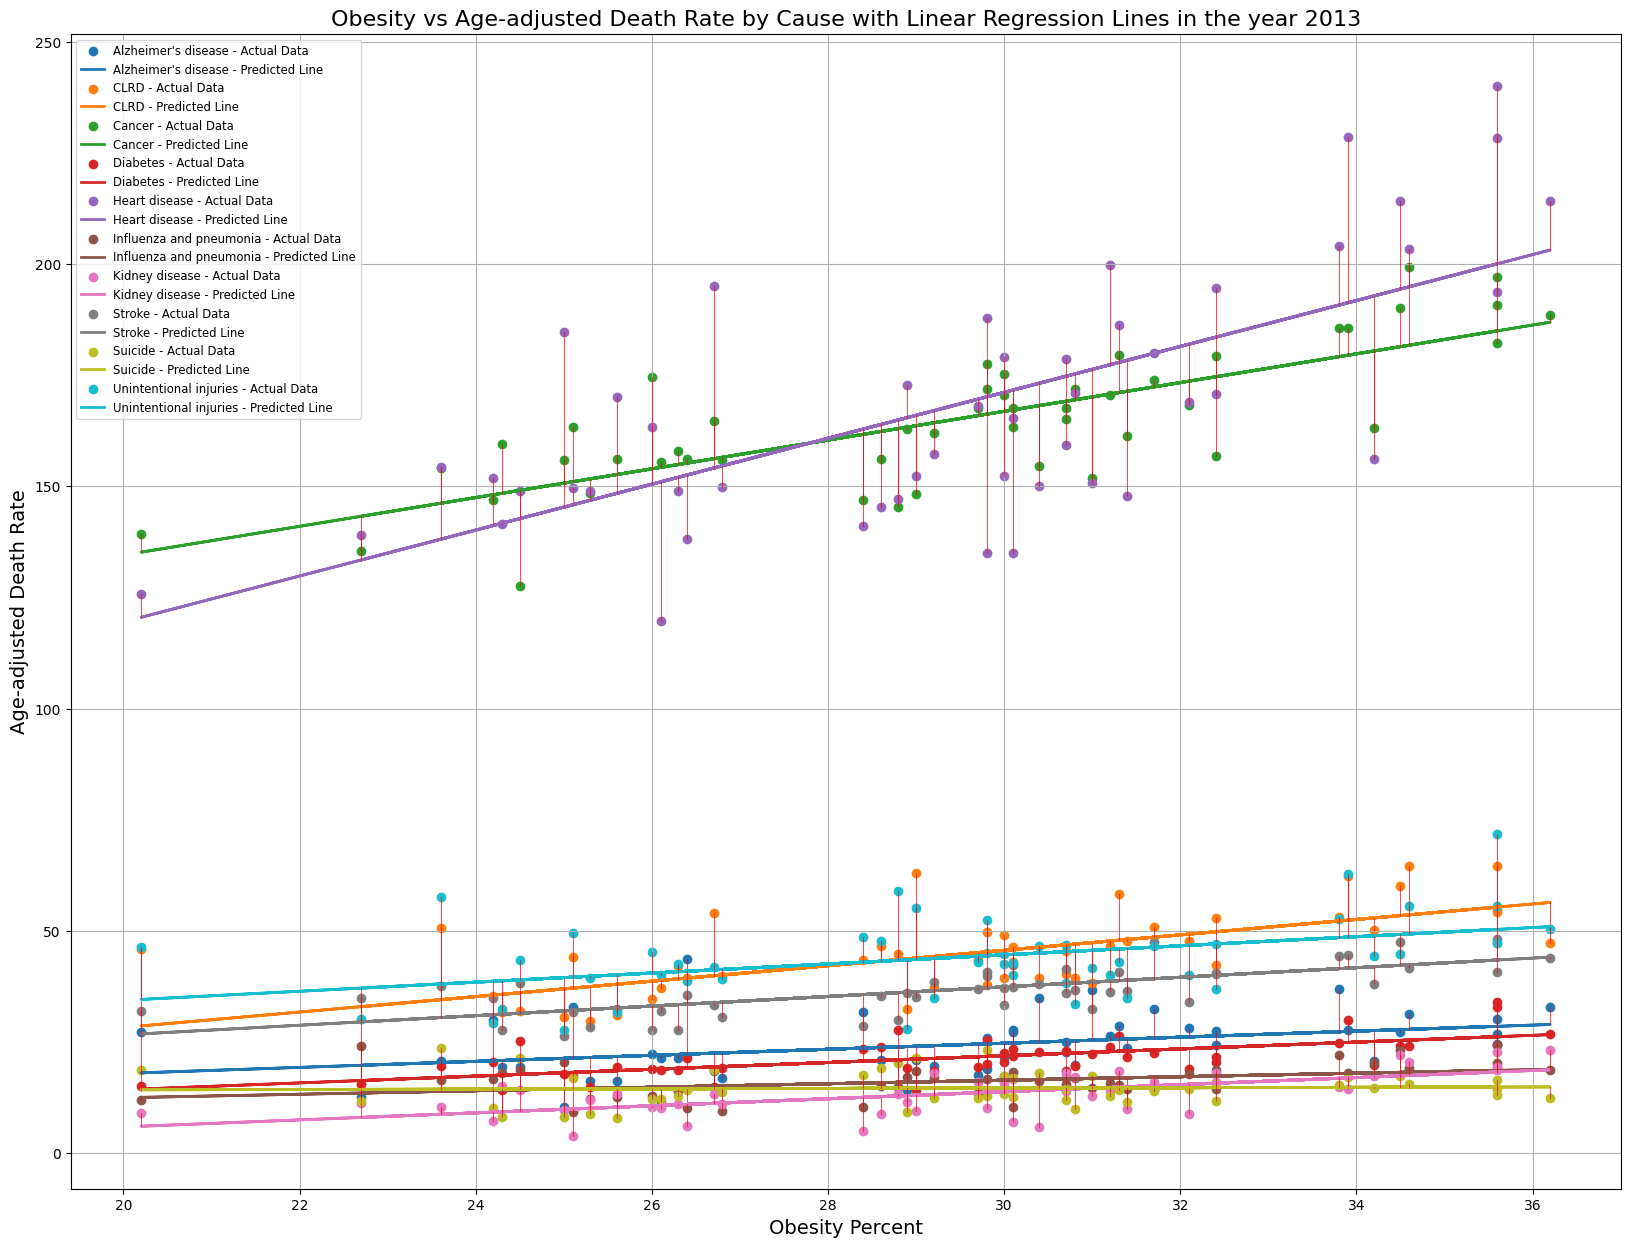

In [182]:

# Setting up the LinearRegression model
linModel = LinearRegression()

# Plotting each cause separately
plt.figure(figsize=(20, 15))
for cause, data in YearObesity.groupby('Cause Name'):
    # Extracting specific cause data
    linModel = LinearRegression()
    Obesity = data[['Obesity']]
    Aadr = data[['Age-adjusted Death Rate']]

    # Fitting and predicting
    linModel.fit(Obesity, Aadr)
    yPredicted = linModel.predict(Obesity)

    # Plotting data points and regression line for this cause
    plt.scatter(Obesity, Aadr, label=f'{cause} - Actual Data')
    plt.plot(Obesity, yPredicted, linewidth=2, label=f'{cause} - Predicted Line')

    # Plotting the red error lines for this cause
    for i in range(len(Obesity)):
        plt.plot([Obesity.iloc[i, 0], Obesity.iloc[i, 0]], [Aadr.iloc[i, 0], yPredicted[i, 0]], color='red', linewidth=0.5)

# Adding labels and title
plt.xlabel('Obesity Percent', fontsize=14)
plt.ylabel('Age-adjusted Death Rate', fontsize=14)
plt.title('Obesity vs Age-adjusted Death Rate by Cause with Linear Regression Lines in the year 2013', fontsize=16)
plt.legend(fontsize='small')
plt.grid(True)

# Displaying the plot
plt.show()


**(a) Report loss functions: mean squared error, root mean squared error, mean absolute error.**

This code accomplishes two primary objectives: visualizing relationships between obesity percentages and age-adjusted death rates for different causes, and reporting error metrics for each cause. It begins by importing necessary libraries for regression modeling (LinearRegression from sklearn), calculating error metrics (mean_squared_error and mean_absolute_error from sklearn.metrics), and for numerical operations and plotting (numpy and matplotlib.pyplot). The YearObesity DataFrame is grouped by 'Cause Name,' enabling a focused analysis for each cause.

For each cause, the code isolates the 'Obesity' column as the feature and the 'Age-adjusted Death Rate' column as the target. The LinearRegression model is trained using these columns, and predictions are made based on the feature data. Error metrics — Mean Squared Error (MSE), Root Mean Squared Error (RMSE) (calculated as the square root of MSE), and Mean Absolute Error (MAE) — are computed to evaluate the model's performance. These metrics quantify the discrepancies between the actual and predicted death rates for each cause and are stored in a dictionary for later display.

The visualization process involves creating scatter plots of the actual data points for each cause and overlaying the regression line representing the predicted values. Red vertical lines are plotted to indicate the differences between actual and predicted values, highlighting the model's errors. Labels, a title, and a legend are added for clarity, and the final plot is displayed.

Lastly, the script prints the error metrics for each cause, providing a concise summary of the model's performance in predicting age-adjusted death rates based on obesity percentages. This combination of visual and numerical evaluation helps to understand the regression results and the model's predictive accuracy for each cause.

In [183]:
#Predict the values using the linear model
y_pred = linModel.predict(Obesity)

# Calculate MSE
mse = mean_squared_error(Aadr, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(Aadr, y_pred)

# Print the loss functions
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 64.58231912520483
Root Mean Squared Error (RMSE): 8.036312532822802
Mean Absolute Error (MAE): 6.174024961087131


In [184]:
ten_fold_scores = -cross_val_score(
    linModel, Obesity, Aadr, scoring='neg_mean_squared_error', cv=10
)

# (2) Identify more than two attributes in the consumable usage dataset and develop a multiple linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using mplot3d to show the observed and the predicted values.


I first stored relevant columns as variables, then I fit a least squares multiple linear regression model


In [185]:
X = YearObesity[['Obesity', 'Cause Name Encoded']].values.reshape(-1, 2)
y = YearObesity[['Deaths']].values.reshape(-1, 1)


after fitting the model, we wrote the least squares model as an equation to show how it came up with the predicited deaths


In [186]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted Deaths = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Population)",
    " + ",
    linModel.coef_[0][1],
    "* (Cause Name Encoded)",
)


Predicted Deaths =  7528.0500291804965  +  -65.84287958387283 * (Population)  +  -394.8305454545453 * (Cause Name Encoded)


This code generates a 3D scatter plot with a regression plane overlay. The regression plane code and np.meshgrid defines a meshgrid for the yObesity and xCause (first two features in X), and calculates the zDeaths values using the linear model's coefficients and intercept. This creates a blue, semi-transparent regression surface that represents the predicted plane.


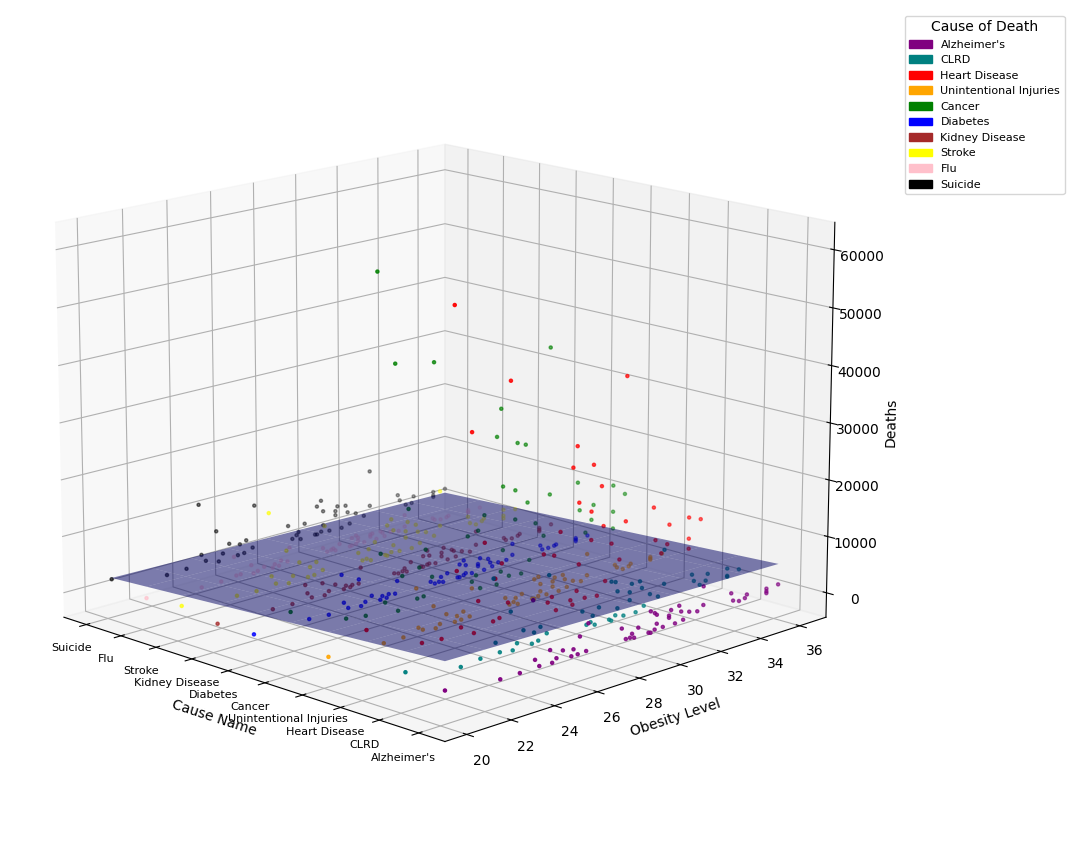

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches  # For the legend

# Example mapping for cause names
cause_name_mapping = {
    0: 'Alzheimer\'s',
    1: 'CLRD',
    2: 'Heart Disease',
    3: 'Unintentional Injuries',
    4: 'Cancer',
    5: 'Diabetes',
    6: 'Kidney Disease',
    7: 'Stroke',
    8: 'Flu',
    9: 'Suicide'
}

# Set up the figure
fig = plt.figure(figsize=(14, 11))
ax = fig.add_subplot(111, projection='3d')

# Define color map for each cause
cause_colors = {
    0: 'purple',  # Alzheimer's
    1: 'teal',    # CLRD
    2: 'red',     # Heart Disease
    3: 'orange',  # Unintentional Injuries
    4: 'green',   # Cancer
    5: 'blue',    # Diabetes
    6: 'brown',   # Kidney Disease
    7: 'yellow',  # Stroke
    8: 'pink',    # Flu
    9: 'black'    # Suicide
}

# Plot the data points with color coding by cause name
colors = [cause_colors[cause] for cause in X[:, 1]]  # Map each cause to a color
ax.scatter3D(X[:, 1], X[:, 0], y, color=colors, s=5)  # Swap x and y axes

# Plot the regression plane
xCause, yObesity = np.meshgrid(
    np.linspace(X[:, 1].min(), X[:, 1].max(), 10),  # Cause values on x-axis
    np.linspace(X[:, 0].min(), X[:, 0].max(), 10)   # Obesity levels on y-axis
)
zDeaths = (
    linModel.intercept_[0]
    + linModel.coef_[0][0] * yObesity  # Obesity levels affect z
    + linModel.coef_[0][1] * xCause   # Cause names affect x
)
ax.plot_surface(xCause, yObesity, zDeaths, color='blue', alpha=0.5)

# Set labels
ax.set_xlabel('Cause Name')
ax.set_ylabel('Obesity Level')
ax.set_zlabel('Deaths')

# Set x-axis ticks to the encoded values and labels to the cause names
ax.set_xticks(list(cause_name_mapping.keys()))  # Set the positions of the ticks
ax.set_xticklabels(list(cause_name_mapping.values()), fontsize=8)

# Adjust the y-axis (obesity levels) to increase from left to right
ax.invert_yaxis()

# Adjust view angle
ax.view_init(elev=15, azim=135)

# Create a legend
legend_patches = [mpatches.Patch(color=color, label=name) for name, color in zip(cause_name_mapping.values(), cause_colors.values())]
ax.legend(handles=legend_patches, title="Cause of Death", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=8)

# Show plot
plt.show()



The plot visualizes the relationship between obesity levels and the corresponding death counts across various causes. It displays the observed data for deaths at different obesity levels and cause categories, while also illustrating the predictive model's estimates for death counts based on the increasing obesity levels. This allows for a clear comparison between actual values and predicted outcomes, highlighting the impact of increased obesity on mortality rates for each specific cause.

**(a) Report loss functions: mean squared error, root mean squared error, mean absolute error.**

**Code:** We first got the predicted values by using linModel.predict, then passing in deaths. Then we calculated the mean squared error, which compares the predicted values to the actual values, then the results from that were passed into root mean squared error, which squared the results. lastly we calculated mean absolute error which gets the actual values that our predictions were off by.

In [188]:
# Predict the values using the linear model
y_pred = linModel.predict(X)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Print the loss functions
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 48126864.03069132
Root Mean Squared Error (RMSE): 6937.352811461395
Mean Absolute Error (MAE): 3850.954406536416


**Explanation**

 Although the range of numbers seem very high, these ranges are actually reasonable, since the scale of our deaths value has a wide range; from the 10,000's to 100,000 thousand.

**Mean Squared Error:** MSE represents the average of the squared differences between the predicted values y_pred, *which is predicted deaths*, and the true values y, *which is the actual values in the death column in our dataframe*. Its units are the square of the target variable's units

**Root Mean Squared Error:** The root mean squared error is the mean squared error after you take the square root. after taking the square root, we got 6085, which is the average error, but penalizes larger errors heavier by squaring them.

**Mean Absolute Error:** MAE is the average of the absolute differences between the predicted values y predicted and the true values y. The MAE is approximately 3359, which means that, on average, the model's predictions are off by about 3,359 deaths.

# (3) Develop a logistic regression model among some identified attributes in the consumable usage dataset and sklearn.linear_model.LogisticRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.


To develop a logistic regression model, we focused on the "Cause Name" column, categorizing "Suicide" as a value of 1 to represent intentional death, and "Unintentional Injuries" as 0 to signify unintentional deaths. We first created a subset of the dataset, referred to as the heartAndSuicide dataframe, which exclusively contained the causes "Suicide" and "Unintentional Injuries" for clarity and specificity in modeling.

To facilitate the logistic regression, we used the .loc method to convert all instances of "Suicide" into 1 and all instances of "Unintentional Injuries" into 0. This transformation allowed us to prepare the data for binary classification. Subsequently, we applied the fit method with np.ravel() to train the logistic regression model on the processed data.

For visual representation, we generated the xDelta array for input values and computed the predicted probabilities (yDeltaProb) using the predict_proba method. This enabled us to plot the logistic regression curve, illustrating the model's decision boundary. The plot was enhanced with a legend and grid for improved readability and interpretation of the results.

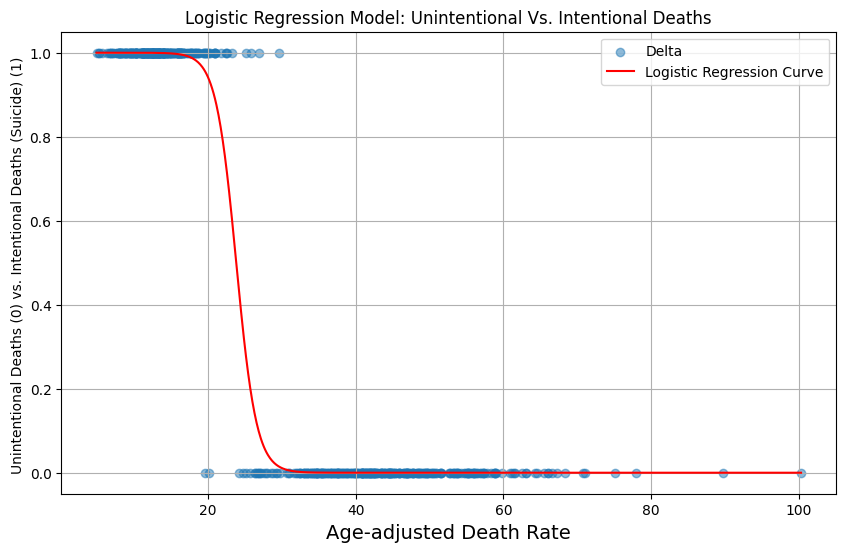

Absolute Loss: 0.49928296142051876
Log Loss: 0.036490480689604185


In [189]:


sethDf = df[df['State'] != 'United States']

logisticDf = sethDf[(sethDf['Cause Name'] == 'Suicide') | (sethDf['Cause Name'] == 'Unintentional injuries')]

logisticDf.loc[logisticDf['Cause Name'] == 'Suicide', 'Cause Name'] = 1
logisticDf.loc[logisticDf['Cause Name'] == 'Unintentional injuries', 'Cause Name'] = 0

X = logisticDf[['Age-adjusted Death Rate']].values.reshape(-1, 1) # No need to reshape
y = logisticDf['Cause Name'].values.reshape(-1, 1).astype(int)  # Dependent variable (binary classification)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

# Logistic regression predicting cause of death by Age-Adjusted Death Rate
logisticModel = LogisticRegression()
logisticModel.fit(X_train, np.ravel(y_train.astype(int)))

plt.figure(figsize=(10, 6))

# Graph logistic regression probabilities
plt.scatter(X_test, y_test, label="Delta", alpha=0.5)

x_prob = np.linspace(X_test.min(), X_test.max(), 1000)
yPredicted = logisticModel.predict(X).reshape(-1, 1).astype(int) #use yPredicted
y_prob = logisticModel.predict_proba(x_prob.reshape(-1, 1))[:, 1]

# Plotting the logistic regression curve
plt.plot(x_prob, y_prob, color='red', label='Logistic Regression Curve')

plt.xlabel('Age-adjusted Death Rate', fontsize=14)
plt.ylabel('Unintentional Deaths (0) vs. Intentional Deaths (Suicide) (1) ', fontsize=10)
plt.title('Logistic Regression Model: Unintentional Vs. Intentional Deaths', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

p_hat = logisticModel.predict_proba(X_test)

log_loss = metrics.log_loss(y_test, p_hat)
absolute_loss = np.mean(np.abs(y_test - p_hat[:, 1]))

print("Absolute Loss:", absolute_loss)
print("Log Loss:", log_loss)

Maximum Age-adjusted Death Rate for the cause suicide

In [190]:
print(df_cleaned[df_cleaned['Cause Name'] == 'Suicide']['Age-adjusted Death Rate'].max())

29.6


Minimum Age-adjusted Death Rate for the cause suicide

In [191]:
print(df_cleaned[df_cleaned['Cause Name'] == 'Suicide']['Age-adjusted Death Rate'].min())

5.9


Maximum Age-adjusted Death Rate for the cause Unintentional injuries

In [192]:
print(df_cleaned[df_cleaned['Cause Name'] == 'Unintentional injuries']['Age-adjusted Death Rate'].max())

100.3


Minimum Age-adjusted Death Rate for the cause Unintentional injuries

In [193]:
print(df_cleaned[df_cleaned['Cause Name'] == 'Unintentional injuries']['Age-adjusted Death Rate'].min())

19.6


Suicide disproportionately impacts younger age groups. A high number of suicides in younger age brackets can pull the overall age-adjusted rate down since older age groups, where deaths might be more common for other causes are less affected by suicide.

Since Unintentional injury related deaths tend to happen in early adult hood until late life, this can give a bigger range to the data and also push the overall age-adjusted death rate up to the 20s and all the way to the 100s

The logistic regression model enables us to predict whether a death was intentional or unintentional based on the age-adjusted death rate. As illustrated by the logistic regression curve, the model suggests that higher age-adjusted death rates are associated with a higher probability of the death being unintentional, while lower age-adjusted death rates are more strongly correlated with intentional deaths (Suicides). This relationship highlights the role of age-adjusted death rates in distinguishing between the two categories of death, providing valuable insights for further analysis and decision-making.

**(a) Report: absolute loss, log loss**
* **Absolute Loss:**
    * The Absolute Loss was calculated as 0.49928296142051876.
* **Log Loss:**
    * The Log Loss was calculated as 0.036490480689604185.

# (4) Apply cross-validation techniques (at least one) in each of the above cases, and compare the results with simple train-test splits.


In [194]:


# Split the data into training and testing sets (simple train-test split)
YearObesityTrainingdata, testData = train_test_split(YearObesity, test_size=0.20, random_state=42)

# Define features and target variable for train-test split
X_train = YearObesityTrainingdata[['Obesity']].values.reshape(-1, 1)
y_train = YearObesityTrainingdata['Age-adjusted Death Rate'].values.reshape(-1, 1)
X_test = testData[['Obesity']].values.reshape(-1, 1)
y_test = testData['Age-adjusted Death Rate'].values.reshape(-1, 1)

# Train the linear regression model on the train-test split
linModel.fit(X_train, y_train)

# Predict on the test set
y_pred = linModel.predict(X_test)

# Calculate MSE for the train-test split
mse_test_split = mean_squared_error(y_test, y_pred)

# Apply 10-Fold Cross-Validation
X_cv = YearObesityTrainingdata[['Obesity']].values.reshape(-1, 1)
y_cv = YearObesityTrainingdata['Age-adjusted Death Rate'].values.reshape(-1, 1)

# Calculate 10-fold cross-validation scores
ten_fold_scores = -cross_val_score(
    linModel, X_cv, y_cv, scoring='neg_mean_squared_error', cv=10
)

# Compare results
print("Train-Test Split MSE:", mse_test_split)
print("10-Fold Cross-Validation MSE Scores:", ten_fold_scores)
print("Mean Cross-Validation MSE:", ten_fold_scores.mean())
print("Standard Deviation of Cross-Validation MSE:", ten_fold_scores.std())


Train-Test Split MSE: 2678.3949781998604
10-Fold Cross-Validation MSE Scores: [3001.09253313 3086.63827179 2939.0917397  3544.47597094 4750.70100885
 2764.3796057  5006.40576346 3844.55231784 3627.45131446 2991.09726222]
Mean Cross-Validation MSE: 3555.5885788085616
Standard Deviation of Cross-Validation MSE: 739.869089936003


In [195]:
# Split the data into training and testing sets (simple train-test split)
df_cleanedTrainingdata, testData = train_test_split(df_cleaned, test_size=0.20, random_state=42)

# Define features and target variable for train-test split
X_train = df_cleanedTrainingdata[['Population', 'Cause Name Encoded']].values
y_train = df_cleanedTrainingdata['Deaths'].values.reshape(-1, 1)
X_test = testData[['Population', 'Cause Name Encoded']].values
y_test = testData['Deaths'].values.reshape(-1, 1)

# Train the linear regression model on the train-test split
linModel.fit(X_train, y_train)

# Predict on the test set
y_pred = linModel.predict(X_test)

# Calculate MSE for the train-test split
mse_test_split = mean_squared_error(y_test, y_pred)

# Apply 10-Fold Cross-Validation
X_cv = df_cleanedTrainingdata[['Population', 'Cause Name Encoded']].values
y_cv = df_cleanedTrainingdata['Deaths'].values.reshape(-1, 1)

# Calculate 10-fold cross-validation scores
ten_fold_scores = -cross_val_score(
    linModel, X_cv, y_cv, scoring='neg_mean_squared_error', cv=10
)

# Compare results
print("Train-Test Split MSE:", mse_test_split)
print("10-Fold Cross-Validation MSE Scores:", ten_fold_scores)
print("Mean Cross-Validation MSE:", ten_fold_scores.mean())
print("Standard Deviation of Cross-Validation MSE:", ten_fold_scores.std())

Train-Test Split MSE: 31387054.351258624
10-Fold Cross-Validation MSE Scores: [43385593.4664676  41274126.66350923 40249021.55211613 44284058.48980391
 32477262.04258518 29243461.41592866 41531399.19074206 45714339.38154525
 31989699.03911251 36110513.71363879]
Mean Cross-Validation MSE: 38625947.495544925
Standard Deviation of Cross-Validation MSE: 5469983.543792033


In [196]:
logisticDf = logisticDf.copy() # Create an explicit copy of the DataFrame
logisticDf.loc[:, 'Cause Name Encoded'] = label_encoder.fit_transform(logisticDf['Cause Name'])

# Split data into training and test sets
logisticDfTrainingdata, testData = train_test_split(logisticDf, test_size=0.20, random_state=42)

# Features and target variable
X_train = logisticDfTrainingdata[['Age-adjusted Death Rate']].values
y_train = logisticDfTrainingdata['Cause Name Encoded'].values
X_test = testData[['Age-adjusted Death Rate']].values
y_test = testData['Cause Name Encoded'].values

# Logistic regression model
logModel = LogisticRegression(max_iter=1000)

# Train-test split evaluation
logModel.fit(X_train, y_train)
y_pred_test = logModel.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy with train-test split: {test_accuracy:.2f}")

# 10-fold cross-validation
cv_scores = cross_val_score(logModel, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.2f}")

Test accuracy with train-test split: 0.98
Cross-validation scores: [0.98709677 1.         0.99354839 0.99354839 0.98709677 0.99354839
 0.96774194 0.98709677 0.98064516 1.        ]
Mean cross-validation accuracy: 0.99


The three sets of code provided above use the same methods , but are tailored to the three different models. The first set of code applies to Model 1, the second set corresponds to Model 2, and the third set is for Model 3.

Each set of code begins by taking the respective DataFrame for the model. It then splits the data into training and testing sets, with 80% of the data allocated to training and the remaining 20% to testing. After the split, the model makes predictions on the test data. These predictions are then evaluated against the actual test data to assess the model's performance.

# (5) Apply bootstrap method to one of the models and report the error mean and standard deviation.

This code is using bootstrap resampling to
generate multiple bootstrap samples of the data,
Train a linear regression model on each bootstrap sample,
Test the model on the out-of-bag data,
calculate the MSE for each iteration and store it in the bootstrapErrors list.
This process helps in assessing the variability of model performance across different samples of the data, providing a way to estimate how stable the model's performance is.

In [197]:
# Create bootstrap samples and collect errors

bootstrapErrors = []
for i in range(0, 30):
    # Create the bootstrap sample and the out-of-bag sample
    boot = resample(YearObesity, replace=True, n_samples=51)
    oob = YearObesity[~YearObesity.index.isin(boot.index)]

    # Fit a linear model to the bootstrap sample
    XBoot = boot[
        ['Obesity']
    ].values.reshape(-1, 1)
    yBoot = boot[['Age-adjusted Death Rate']].values.reshape(-1, 1)
    linModel = LinearRegression()
    linModel.fit(XBoot, yBoot)

    # Predict y values for the out-of-bag sample
    XOob = oob[
        ['Obesity']
    ].values.reshape(-1, 1)
    YOob = oob[['Age-adjusted Death Rate']].values.reshape(-1, 1)
    YOobPredicted = linModel.predict(XOob)

    # Calculate the error
    bootError = mean_squared_error(YOob, YOobPredicted)
    bootstrapErrors.append(bootError)

This part calculates the man of all the bootstrap errors

In [198]:
# Calculate the mean of the errors
np.mean(bootstrapErrors)

3519.3115715437552

a mean of the value above of all the bootstrap errors is relatively moderate since the data for age adjusted death rate ranges from 2.6 to 1087 and the obesity rate ranges from 20.2 to 36.2. This shows how much the predictions are off


In [199]:
# Calculate the standard deviation of the errors
np.std(bootstrapErrors)

189.7714024803776

the high standard deviation of the bootstrap errors indicates that the errors are pretty consistent and may happen often.


This code creates a scatter plot which shows the mean squared error of the values.

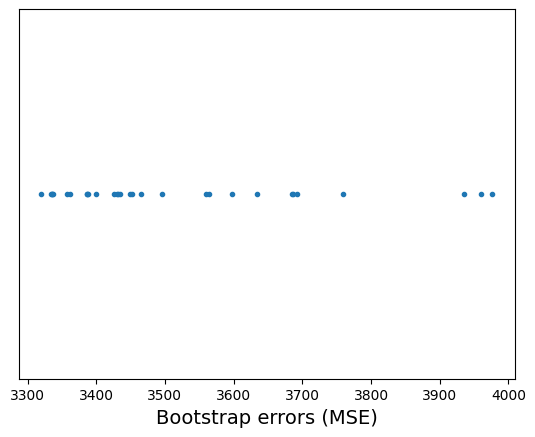

In [200]:
# Plot the errors
plt.plot(bootstrapErrors, np.zeros_like(bootstrapErrors), '.')
plt.xlabel('Bootstrap errors (MSE)', fontsize=14)
plt.gca().axes.yaxis.set_ticks([]);

as you can see most are around the 3400 range and some outliers reach all the way to the 3900 range. This means, from most of the samples, they predicted about 3400 to 3500 away from the actual values.

# (6) Compare models using one-standard-error or adjusted-R-squared methods, and report.


To evaluate and compare the performance of different polynomial regression models, I utilized the YearObesity dataset, which includes data on obesity percentages and age-adjusted death rates for heart disease and cancer. Three distinct models were created using polynomial degrees of 1, 3, and 5, respectively. These models were then plotted to visually assess how well each degree represented the underlying patterns in the data. The goal was to identify the model that most effectively captured the relationship between obesity rates and age-adjusted death rates, thereby providing insight into which degree of polynomial regression best fits the data.

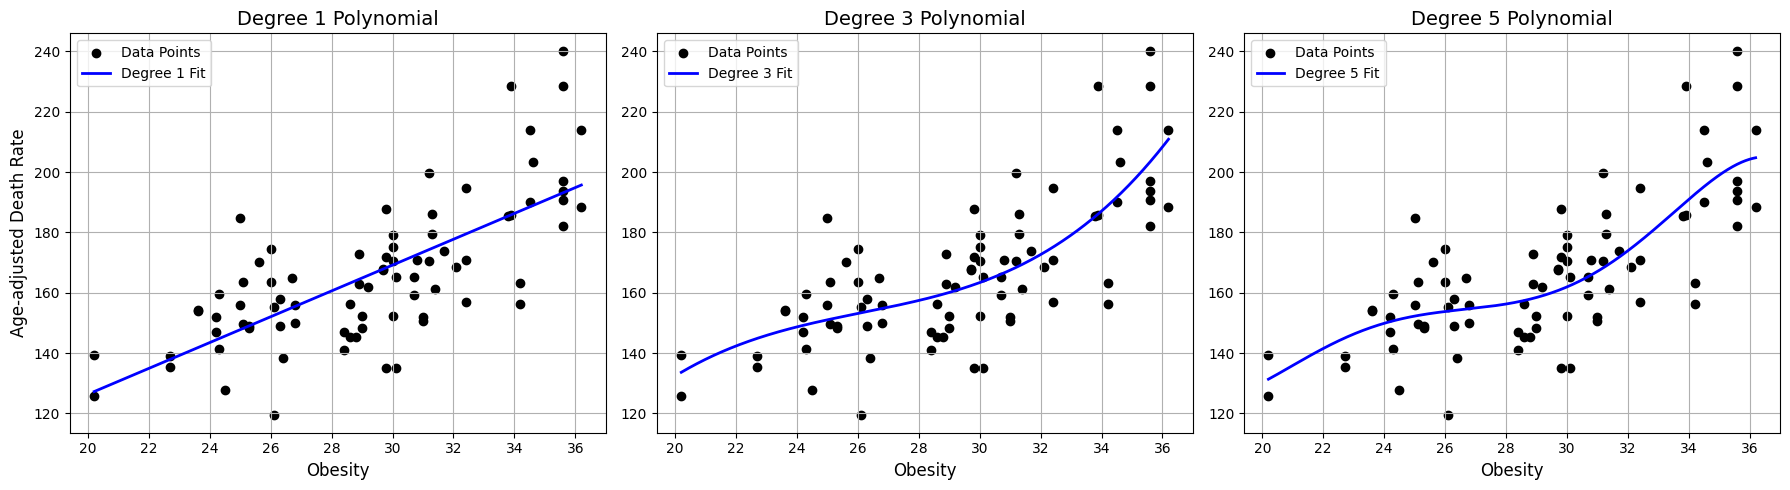

In [201]:
# Split off 20% of the data to be left out as test data
YearObesity = YearObesity[100 < YearObesity["Age-adjusted Death Rate"]] #data plots for heart disease and cancer
yearObesityTrainingData, test_data = train_test_split(YearObesity, test_size=0.20)

# Store relevant columns as variables
X = yearObesityTrainingData[['Obesity']].values.reshape(-1, 1)
y = yearObesityTrainingData[['Age-adjusted Death Rate']].values.reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fit a cubic regression model
polyFeatures = PolynomialFeatures(degree=1, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))

# Graph the scatterplot and the polynomial regression
axes[0].scatter(X, y, color='black', label='Data Points')
axes[0].plot(xDelta, yDelta, color='blue', linewidth=2, label='Degree 1 Fit')
axes[0].set_title('Degree 1 Polynomial', fontsize=14)
axes[0].set_xlabel('Obesity', fontsize=12)
axes[0].set_ylabel('Age-adjusted Death Rate', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True)

polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))

# Graph the scatterplot and the polynomial regression
axes[1].scatter(X, y, color='black', label='Data Points')
axes[1].plot(xDelta, yDelta, color='blue', linewidth=2, label='Degree 3 Fit')
axes[1].set_title('Degree 3 Polynomial', fontsize=14)
axes[1].set_xlabel('Obesity', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True)

polyFeatures = PolynomialFeatures(degree=5, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))

# Graph the scatterplot and the polynomial regression
axes[2].scatter(X, y, color='black', label='Data Points')
axes[2].plot(xDelta, yDelta, color='blue', linewidth=2, label='Degree 5 Fit')
axes[2].set_title('Degree 5 Polynomial', fontsize=14)
axes[2].set_xlabel('Obesity', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].grid(True)

plt.tight_layout()
plt.show()

As observed from the analysis above, the polynomial regression model with a degree of 3 most effectively captures the underlying pattern in the data, while the degree of 5 overfits the data, providing the best fit for the relationship between obesity rates and age-adjusted death rates. This degree of polynomial offers a more accurate representation of the data compared to the lower-degree models.

To compare the models using the Adjusted R-squared method, we created an array of polynomial degrees, including 1, 3, 5. Using a for loop, we calculated the Adjusted R-squared scores for each degree and identified the model with the highest Adjusted R-squared value, which provided the most accurate fit for the data.

In [202]:
# Comapring models using adjusted r-sqaured method.
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
degrees = [1, 3, 5] # add random degress including using the ones from above
adjusted_r2_scores = []
n_samples = X.shape[0]

for degree in degrees: #loop through degrees
    polyFeatures = PolynomialFeatures(degree=degree, include_bias=False)
    XPoly = polyFeatures.fit_transform(X)
    model = LinearRegression().fit(XPoly, y)
    r2 = r2_score(y, model.predict(XPoly))
    k = XPoly.shape[1]  # Number of predictors
    adjusted_r2_scores.append(adjusted_r2(r2, n_samples, k))

best_degree = degrees[adjusted_r2_scores.index(max(adjusted_r2_scores))] #get the max R2 score!
print(f"Chosen degree using adjusted R-squared: {best_degree}")

Chosen degree using adjusted R-squared: 3


The highest Adjusted R-squared score was achieved by the polynomial regression model with the degree presented above, which is further supported by the visual graphs presented, reinforcing that this degree provides the most accurate fit for the data.

# Conclusion

We analyzed a dataset on the leading causes of death in the United States to explore how factors like obesity, population, cause of death, and mortality rates are connected.

**Linear Regression**

We found a clear linear relationship between obesity rates and age-adjusted death rates in 2013. Higher obesity rates generally aligned with higher death rates for certain causes.

We built a multiple linear regression model that predicted the number of deaths based on obesity rates and the cause of death. This helped us understand how these factors combine to impact overall mortality.

We evaluated both models using metrics like MSE, RMSE, and MAE, which gave us a sense of how well the models predicted real-world outcomes.

**Logistic Regression**

We also created a logistic regression model to predict whether a death was intentional (suicide) or unintentional. This showed how age-adjusted death rates play a role in distinguishing between these categories.

To measure the model's performance, we used Absolute Loss and Log Loss, which helped us assess how accurate and reliable its predictions were.

**Model Evaluation:**


Cross-Validation: We tested our models on different subsets of the data to confirm their reliability and robustness across various splits.

Bootstrap Method: By repeatedly sampling the data, we estimated the average error and its variability, which gave us a better understanding of the models stability.

**Model Comparison**

We experimented with polynomial regression to capture more complex relationships between variables. A degree-3 polynomial model turned out to fit the data best, as shown by its adjusted R-squared value and a visual inspection of the fit.